### 讀入基本套件 ###

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.datasets import cifar10, fashion_mnist
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical

### 進行資料預處理 ###

In [3]:
(x_train, y_train0), (x_test, y_test0) = cifar10.load_data()

In [4]:
x_train = x_train/x_train.max()
x_test = x_test/x_test.max()

y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)

(-0.5, 31.5, 31.5, -0.5)

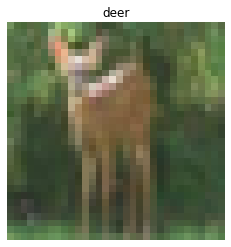

In [5]:
name_list = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
idx = np.random.randint(x_train.shape[0])
x_sample = x_train[idx]
y_sample = y_train0[idx].squeeze()

plt.imshow(x_sample)
plt.title(name_list[y_sample])
plt.axis('off')

### 建構基本模型，並且更改其內部的一些參數 ###

In [6]:
CNN_layer = [Conv2D(16, (3,3), input_shape = (32, 32, 3), padding = 'same', activation = 'relu', name='Conv_1'),
            MaxPool2D(),
            Conv2D(64, (3,3), padding = 'same', activation = 'relu', name='Conv_2'),
            MaxPool2D(),
            Conv2D(256, (3,3), padding = 'same', activation = 'relu', name = 'Conv_3'),
            MaxPool2D(),
            GlobalAveragePooling2D()]
FC_layer = [Dense(128, activation = 'relu'),
             Dense(10, activation = 'softmax')]

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
model = Sequential(CNN_layer + FC_layer)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 16, 16, 64)        9280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 8, 8, 256)         147712    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 256)               0

In [9]:
model.compile(loss='categorical_crossentropy', 
                optimizer=Adam(),
                metrics=['categorical_accuracy'])


In [10]:
model.fit(x_train, y_train, batch_size = 100, epochs = 10, validation_data = (x_test, y_test), shuffle = True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 26s 523us/sample - loss: 1.7778 - categorical_accuracy: 0.3407 - val_loss: 1.6150 - val_categorical_accuracy: 0.4057
Epoch 2/10
50000/50000 [==============================] - 24s 472us/sample - loss: 1.4625 - categorical_accuracy: 0.4656 - val_loss: 1.3556 - val_categorical_accuracy: 0.5027
Epoch 3/10
50000/50000 [==============================] - 23s 470us/sample - loss: 1.3099 - categorical_accuracy: 0.5242 - val_loss: 1.2524 - val_categorical_accuracy: 0.5469
Epoch 4/10
50000/50000 [==============================] - 23s 469us/sample - loss: 1.2020 - categorical_accuracy: 0.5667 - val_loss: 1.1629 - val_categorical_accuracy: 0.5878
Epoch 5/10
50000/50000 [==============================] - 23s 470us/sample - loss: 1.1288 - categorical_accuracy: 0.5942 - val_loss: 1.0966 - val_categorical_accuracy: 0.6080
Epoch 6/10
50000/50000 [==============================] - 23s 469us/sample 

In [11]:
score_train = model.evaluate(x_train, y_train)
score_test = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 188us/sample - loss: 0.8930 - categorical_accuracy: 0.6874


In [12]:
print(f'train_score:{score_train[1]}')
print(f'test_score:{score_test[1]}')

train_score:0.7163199782371521
test_score:0.6873999834060669


### 選擇不同的遷移目標 ###

In [13]:
(x_train1, y_train1), (x_test1, y_test1) = fashion_mnist.load_data()

In [14]:
x_train1 = x_train1/x_train1.max()
x_test1 = x_test1/x_test1.max()
x_train1=x_train1.reshape(60000,28,28,1)
x_test1=x_test1.reshape(10000,28,28,1)

y_train1 = to_categorical(y_train1, 10)
y_test1 = to_categorical(y_test1, 10)

In [15]:
cnn_layer = [Conv2D(32, (3,3),input_shape = (28, 28, 1), padding = 'same', activation = 'relu', name = 'conv_1' ),
            MaxPool2D(),
            Conv2D(64, (3,3), padding = 'same', activation = 'relu', name = 'conv_2'),
            MaxPool2D(),
            Conv2D(256, (5,5), padding = 'same', activation = 'relu', name = 'conv_3'),
            GlobalAveragePooling2D()]

In [16]:
model1 = Sequential(cnn_layer + FC_layer)

In [17]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 7, 7, 256)         409856    
_________________________________________________________________
global_average_pooling2d_1 ( (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 128)              

In [18]:
for layer in FC_layer:
    layer.trainable = False

In [19]:
model1.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(),
              metrics = ['categorical_accuracy'])

In [20]:
model1.fit(x_train1, y_train1, epochs = 10, batch_size = 100, validation_data = (x_test1, y_test1), shuffle= True )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 34s 560us/sample - loss: 0.7043 - categorical_accuracy: 0.7467 - val_loss: 0.4992 - val_categorical_accuracy: 0.8221
Epoch 2/10
60000/60000 [==============================] - 33s 552us/sample - loss: 0.4300 - categorical_accuracy: 0.8468 - val_loss: 0.4360 - val_categorical_accuracy: 0.8393
Epoch 3/10
60000/60000 [==============================] - 33s 551us/sample - loss: 0.3636 - categorical_accuracy: 0.8706 - val_loss: 0.3571 - val_categorical_accuracy: 0.8752
Epoch 4/10
60000/60000 [==============================] - 33s 550us/sample - loss: 0.3272 - categorical_accuracy: 0.8821 - val_loss: 0.3285 - val_categorical_accuracy: 0.8827
Epoch 5/10
60000/60000 [==============================] - 33s 551us/sample - loss: 0.2968 - categorical_accuracy: 0.8928 - val_loss: 0.3097 - val_categorical_accuracy: 0.8875
Epoch 6/10
60000/60000 [==============================] - 33s 553us/sample 

In [21]:
score_train1 = model1.evaluate(x_train1, y_train1)
score_test1 = model1.evaluate(x_test1, y_test1)

print(f'Train Accuracy: {score_train1[1]*100}')
print(f'Test Accuracy: {score_test1[1]*100}')

10000/10000 [==============================] - 2s 232us/sample - loss: 0.2604 - categorical_accuracy: 0.9068
Train Accuracy: 92.41666793823242
Test Accuracy: 90.67999720573425
